In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

class Perceptron:
    def __init__(self, lr=0.01, epochs=50):
        self.lr = lr
        self.epochs = epochs
    
    def model(self , x):
        return 1 if (np.dot(self.w , x)>= self.b) else 0
    
    def predict(self, X):
        Y=[]
        for x in X:
            ans = self.model(x)
            Y.append(ans)
        return np.array(Y)

    def fit(self,X,Y,epochs=None,lr=None):
        if epochs is None:
            epochs = self.epochs
        if lr is None:
            lr = self.lr
            
        self.w = np.ones(X.shape[1])
        self.b = 0

        accuracy = {}
        max_accu = 0

        wt_matrix = []

        for i in range(epochs):
            for x , y in zip(X,Y):
                y_pred = self.model(x)
                if y == 1 and y_pred == 0:
                    self.w = self.w + lr*x
                    self.b = self.b - lr*1
                if y==0 and y_pred == 1:
                    self.w = self.w - lr*x
                    self.b = self.b + lr *1

            wt_matrix.append(self.w)
            accuracy[i] = accuracy_score(self.predict(X),Y)
            if accuracy[i] > max_accu:
                max_accu = accuracy[i]
                s_w = self.w
                s_b = self.b

        self.w = s_w
        self.b = s_b

        print(f"the maximun accuracy is {max_accu}")

        return accuracy

In [46]:
np.random.seed(0)

X = np.array([
    [1,1000],
    [2,1500],
    [3,2000],
    [8,8000],
    [9,8500],
    [10,9000]
], dtype=float)

Y = np.array([0, 0, 0, 1, 1, 1])

In [47]:
p1 = Perceptron(lr=0.01, epochs=50)
acc_before = p1.fit(X, Y)

the maximun accuracy is 0.5


In [48]:
X_norm = (X - X.mean(axis=0)) / X.std(axis=0)#z-score

In [49]:
p2 = Perceptron(lr=0.01, epochs=50)
acc_after=p2.fit(X_norm, Y)

the maximun accuracy is 1.0


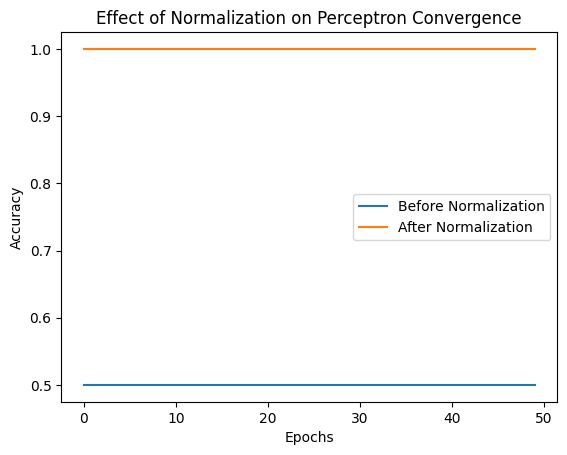

In [50]:
plt.figure()
plt.plot(list(acc_before.keys()), list(acc_before.values()), label="Before Normalization")
plt.plot(list(acc_after.keys()), list(acc_after.values()), label="After Normalization")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Effect of Normalization on Perceptron Convergence")
plt.legend()
plt.show()